In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf 
register_matplotlib_converters()

In [44]:
df = pd.read_csv("C:\c++\My codes\csv files\ice.csv")
df

,DATE,Icecream
0,1/1/1972,59.9622
1,2/1/1972,67.0605
2,3/1/1972,74.2350
3,4/1/1972,78.1120
4,5/1/1972,84.7636
...,...,...
572,9/1/2019,100.1741
573,10/1/2019,90.1684
574,11/1/2019,79.7223
575,12/1/2019,75.7094


In [45]:
df.rename(columns={"DATE":"date" , "Icecream" : "Production"},inplace=True)
df

,date,Production
0,1/1/1972,59.9622
1,2/1/1972,67.0605
2,3/1/1972,74.2350
3,4/1/1972,78.1120
4,5/1/1972,84.7636
...,...,...
572,9/1/2019,100.1741
573,10/1/2019,90.1684
574,11/1/2019,79.7223
575,12/1/2019,75.7094


In [46]:
df['date'] = pd.to_datetime(df.date)

In [47]:
df.set_index('date' , inplace=True)

In [48]:
start_date = pd.to_datetime('2010-01-01')
df_1 = df[start_date:]
df_1

,Production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


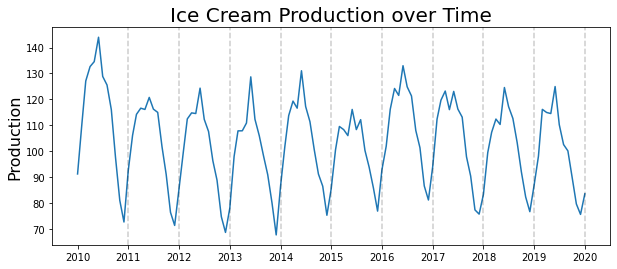

In [49]:
plt.figure(figsize=(10,4))
plt.plot(df_1.Production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF

c:\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


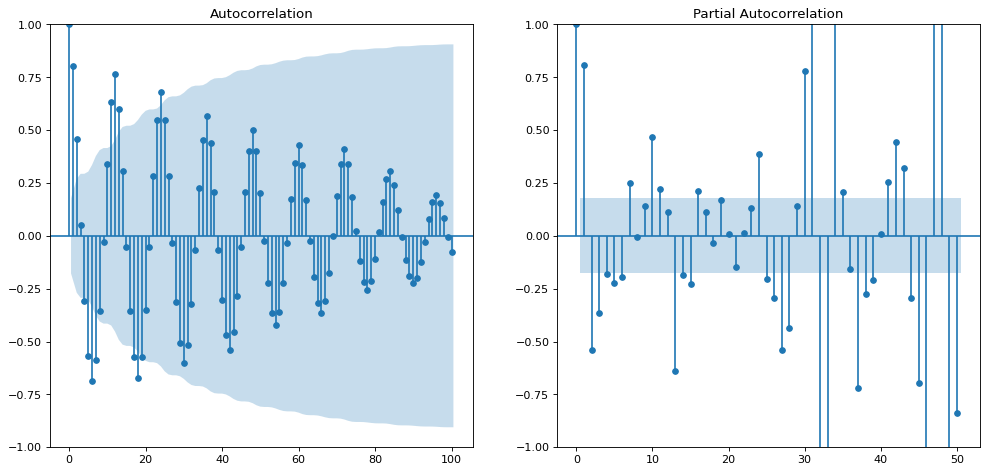

In [50]:
fig , (ax1 ,ax2) = plt.subplots(1 , 2 ,  figsize = (15,7) , dpi = 80)
plot_acf(df_1.Production.to_list() , ax = ax1 , lags=100)
plot_pacf(df_1.Production.to_list() , ax = ax2 , lags=50)
plt.show()

## Based on Decaying acf we are dealing with auto regressive model
## Based on PACF , we should start with an auto regressive model with lags 1,2,3,10,13,20

In [51]:
import yfinance as yf

In [64]:
tickerSymbol = 'spy'

In [65]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [66]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-1')

In [67]:
tickerDf = tickerDf[['Close']]

In [68]:
#see your data
tickerDf.head()

,Close
Date,
2010-01-04 00:00:00-05:00,88.454208
2010-01-05 00:00:00-05:00,88.688347
2010-01-06 00:00:00-05:00,88.750778
2010-01-07 00:00:00-05:00,89.125412
2010-01-08 00:00:00-05:00,89.422012


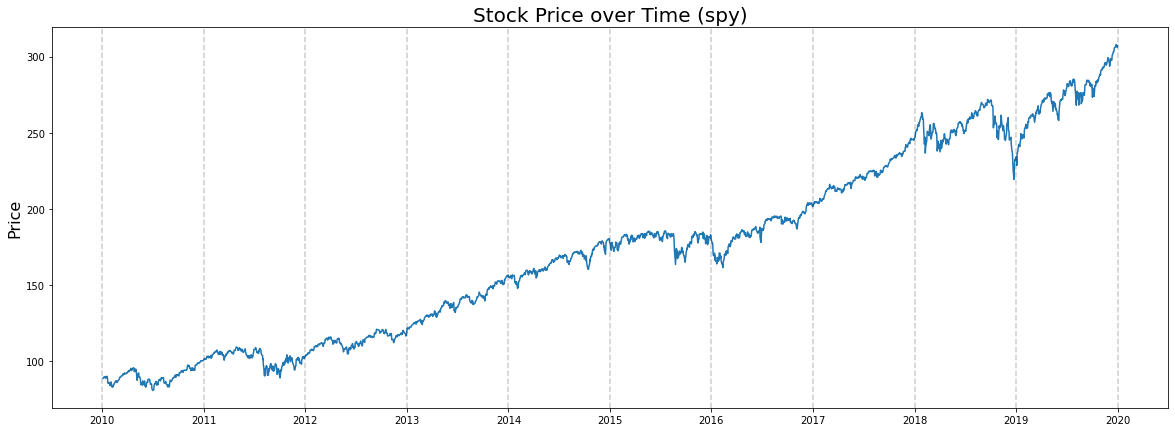

In [69]:
plt.figure(figsize=(20,7))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2010,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [70]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [71]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [72]:
tickerDf.head()

,Close,FirstDifference
Date,,
2010-01-04 00:00:00-05:00,88.454208,0.234138
2010-01-05 00:00:00-05:00,88.688347,0.062431
2010-01-06 00:00:00-05:00,88.750778,0.374634
2010-01-07 00:00:00-05:00,89.125412,0.296600
2010-01-08 00:00:00-05:00,89.422012,0.124886


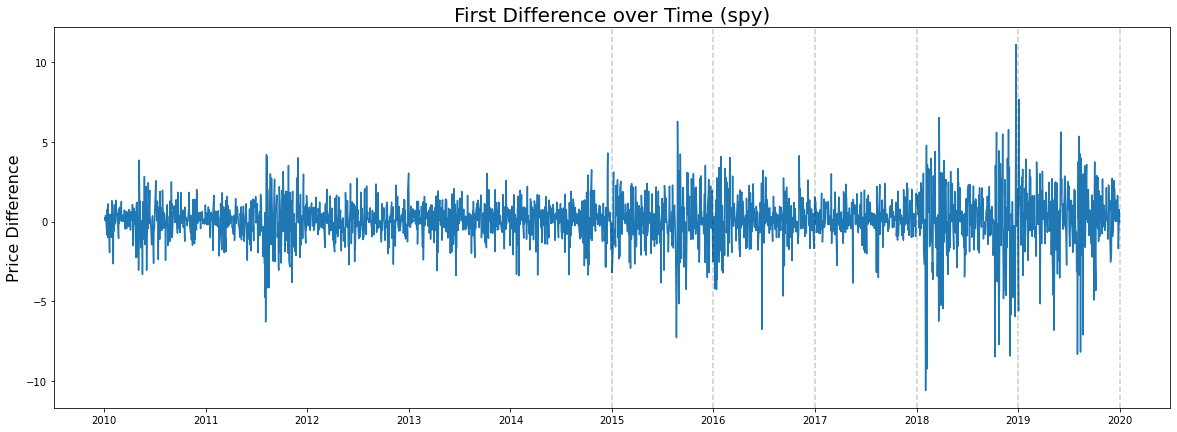

In [74]:
plt.figure(figsize=(20,7))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

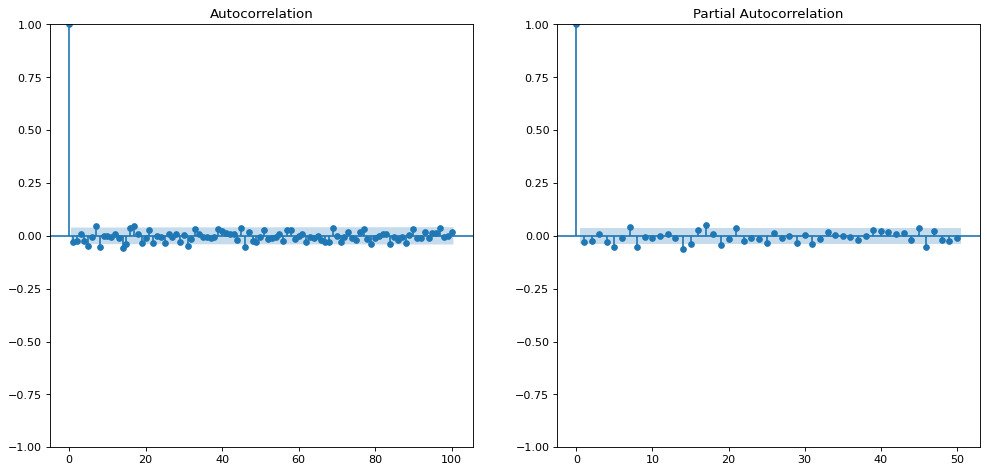

In [77]:
fig , (ax1 ,ax2) = plt.subplots(1 , 2 ,  figsize = (15,7) , dpi = 80)
plot_acf(tickerDf.FirstDifference.to_list() , ax = ax1 , lags=100)
plot_pacf(tickerDf.FirstDifference.to_list() , ax = ax2 , lags=50)
plt.show()